In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

In [2]:
runs=['06']
#runt=np.arange(2,11)
def fname(run):
  return('rundf/df_r_run_land_t' + run + '.pkl')

dfs=[pd.read_pickle(fname(r)) for r in runs]

FileNotFoundError: [Errno 2] No such file or directory: 'rundf/df_r_run_land_t07.pkl'

In [13]:
def getHalfLife(y,ax,tmin=0,tmax=12,C=0,run=00):
  t=np.arange(tmin,tmax+1)
  y=y[tmin:tmax+1]
  def fit_exp_linear(t, y, C=0):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K
  def model_func(t, A, K, C):
    return A * np.exp(K * t) + C

  A, K = fit_exp_linear(t, y, C=C)
  fit_y = model_func(t, A, K, C)

  r2=np.power(np.corrcoef(y,fit_y)[0,1],2)

  ax.plot(t,y)
  ax.plot(t,fit_y)
  ax.grid(True)

  thalf=-np.log(2)/K
  ax.text(0.6,0.8,'t$_{1/2}$=' + str(round(thalf,2)), transform=ax.transAxes)
  ax.text(0.6,0.73,'r$^2$=' + str(round(r2,4)), transform=ax.transAxes)
  ax.text(0.6,0.87,'Landtime=' + str(run), transform=ax.transAxes)
  ax.set_xlabel('Time (h)')
  ax.set_ylabel('Pdef (hPa)')
  return(thalf)

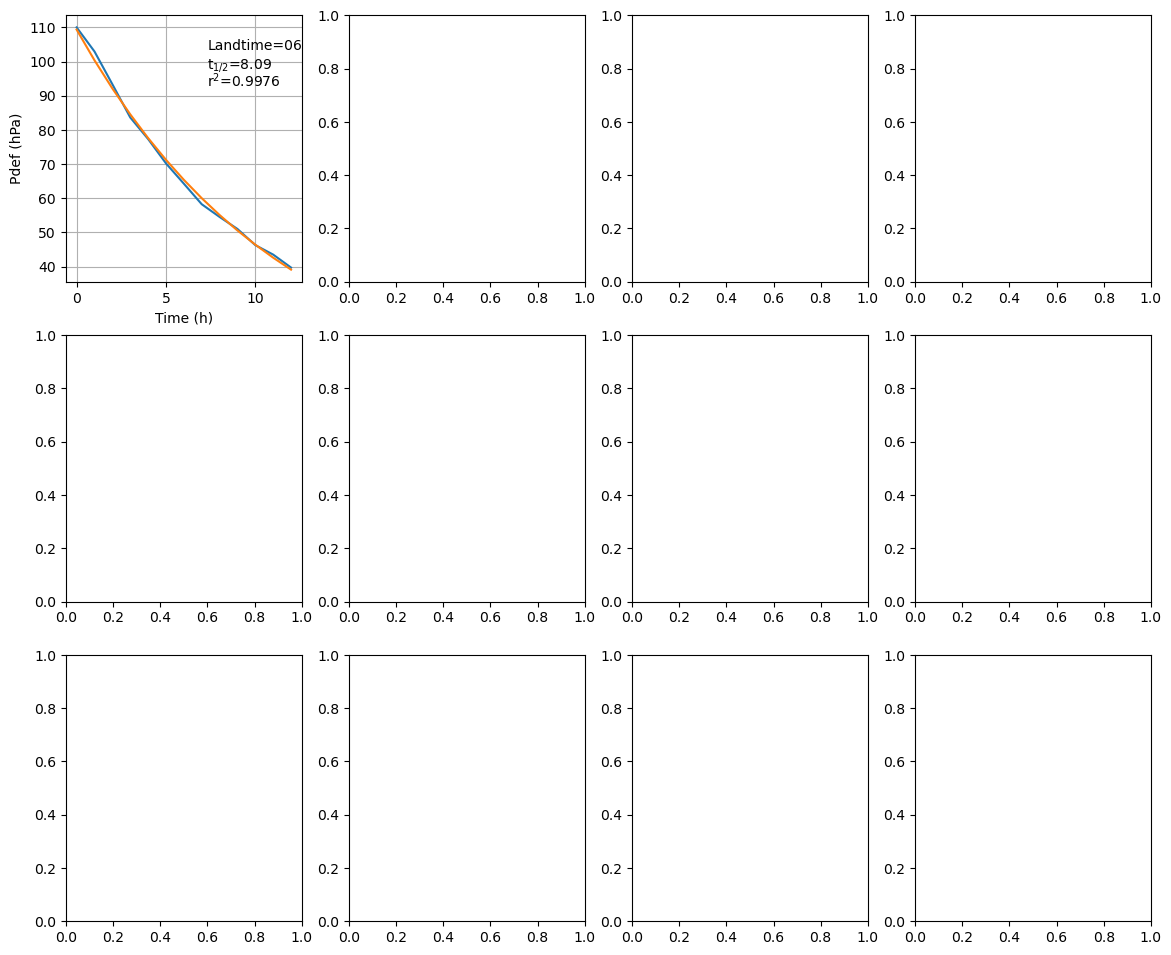

In [14]:
def pdef(p):
  return(1016-p)

fig, axs = plt.subplots(3,4,figsize=(14,12),dpi=100)
P0=[]
R0=[]
V0=[]
th=[]
for n,df in enumerate(dfs):
  p=df.pmin.values
  R0.append(df.rV10max.values[0])
  V0.append(df.V10max.values[0])
  y=pdef(p)
  P0.append(y[0])
  th.append(getHalfLife(y,axs.flat[n],run=runs[n],tmin=0))

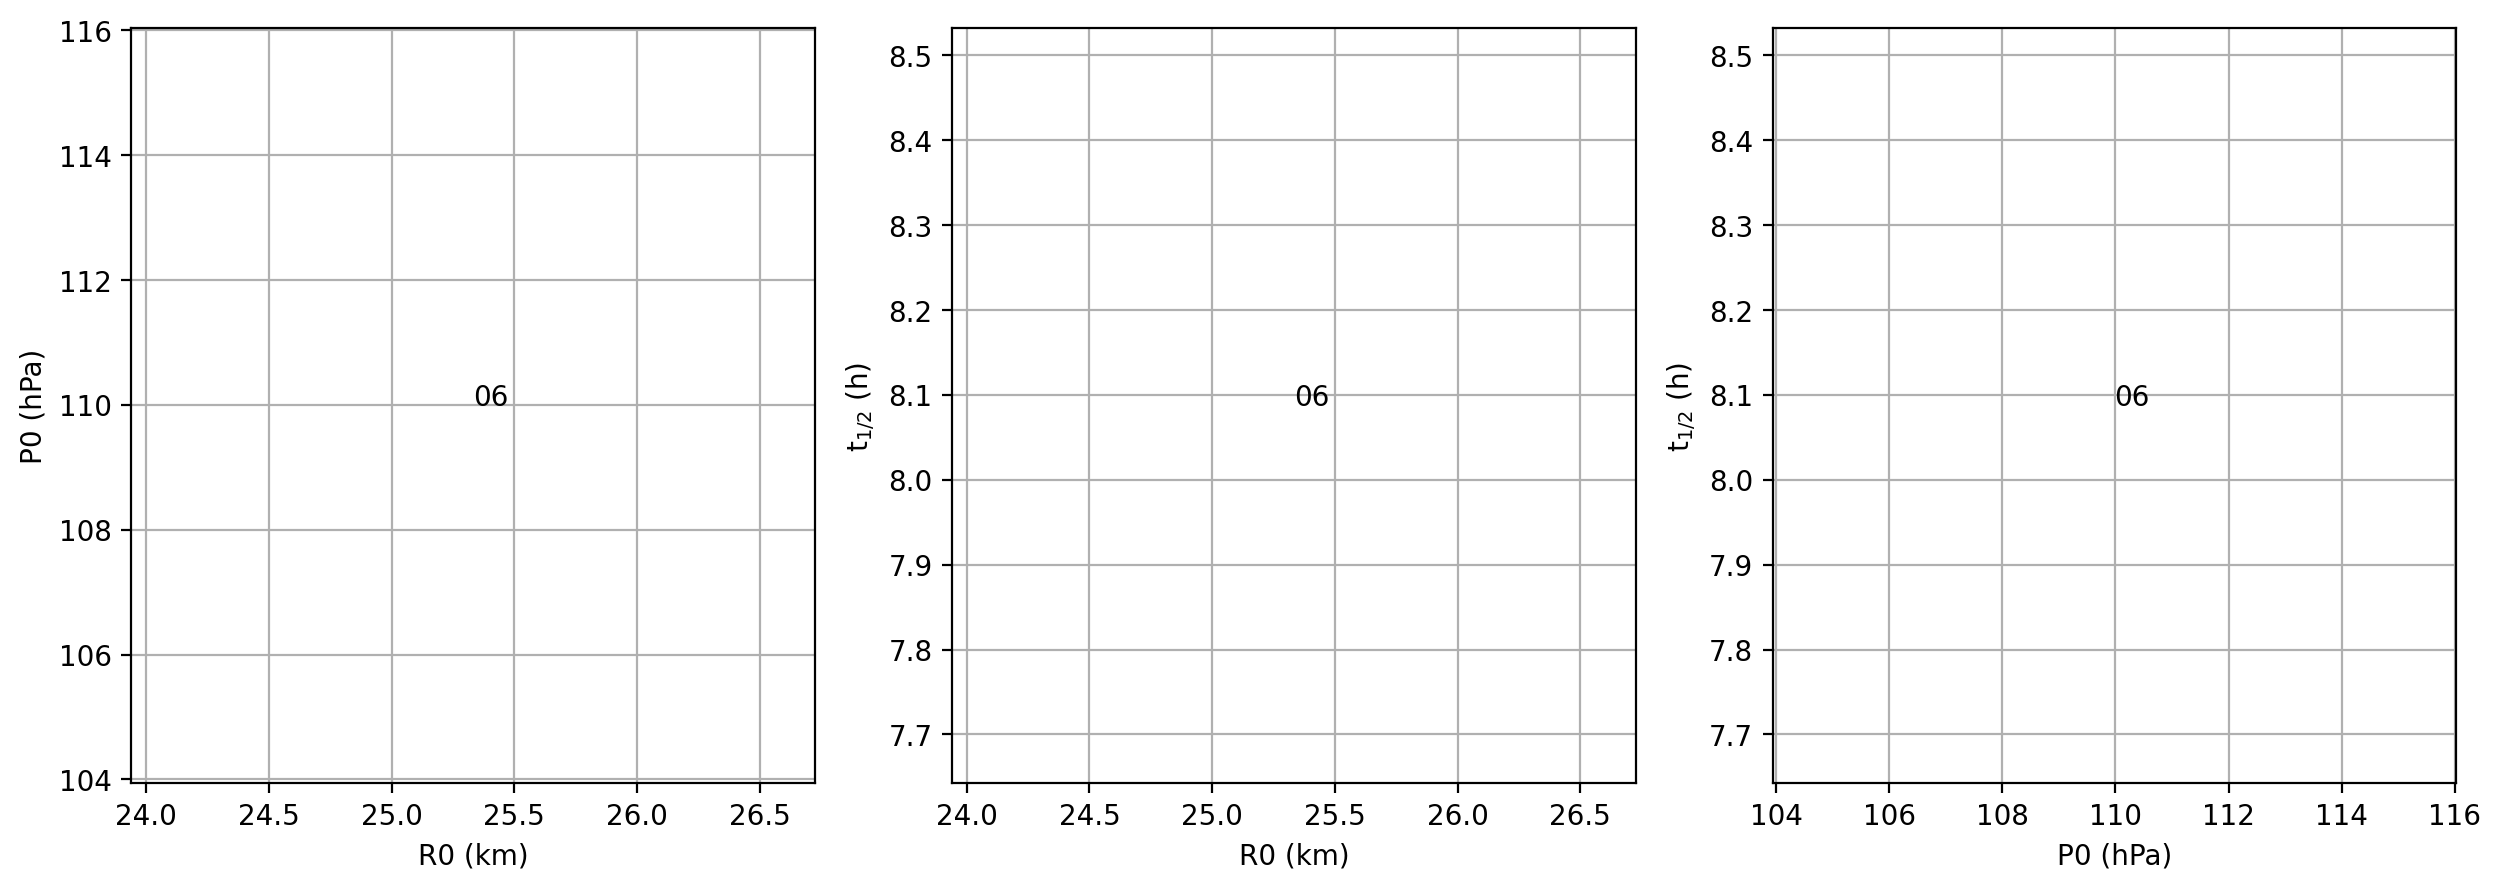

In [6]:
def plot_xy(x,y,xl,yl,ts,ax):
  ax.plot(x,y)
  ax.set_xlabel(xl)
  ax.set_ylabel(yl)
  ax.grid(True)
  for n,t in enumerate(ts):
    ax.text(x[n],y[n],str(t))

fig,axs=plt.subplots(1,3,figsize=(15,5),dpi=200)

plot_xy(R0,P0,'R0 (km)','P0 (hPa)',runs,axs[0])
plot_xy(R0,th,'R0 (km)','t$_{1/2}$ (h)',runs,axs[1])
plot_xy(P0,th,'P0 (hPa)','t$_{1/2}$ (h)',runs,axs[2])



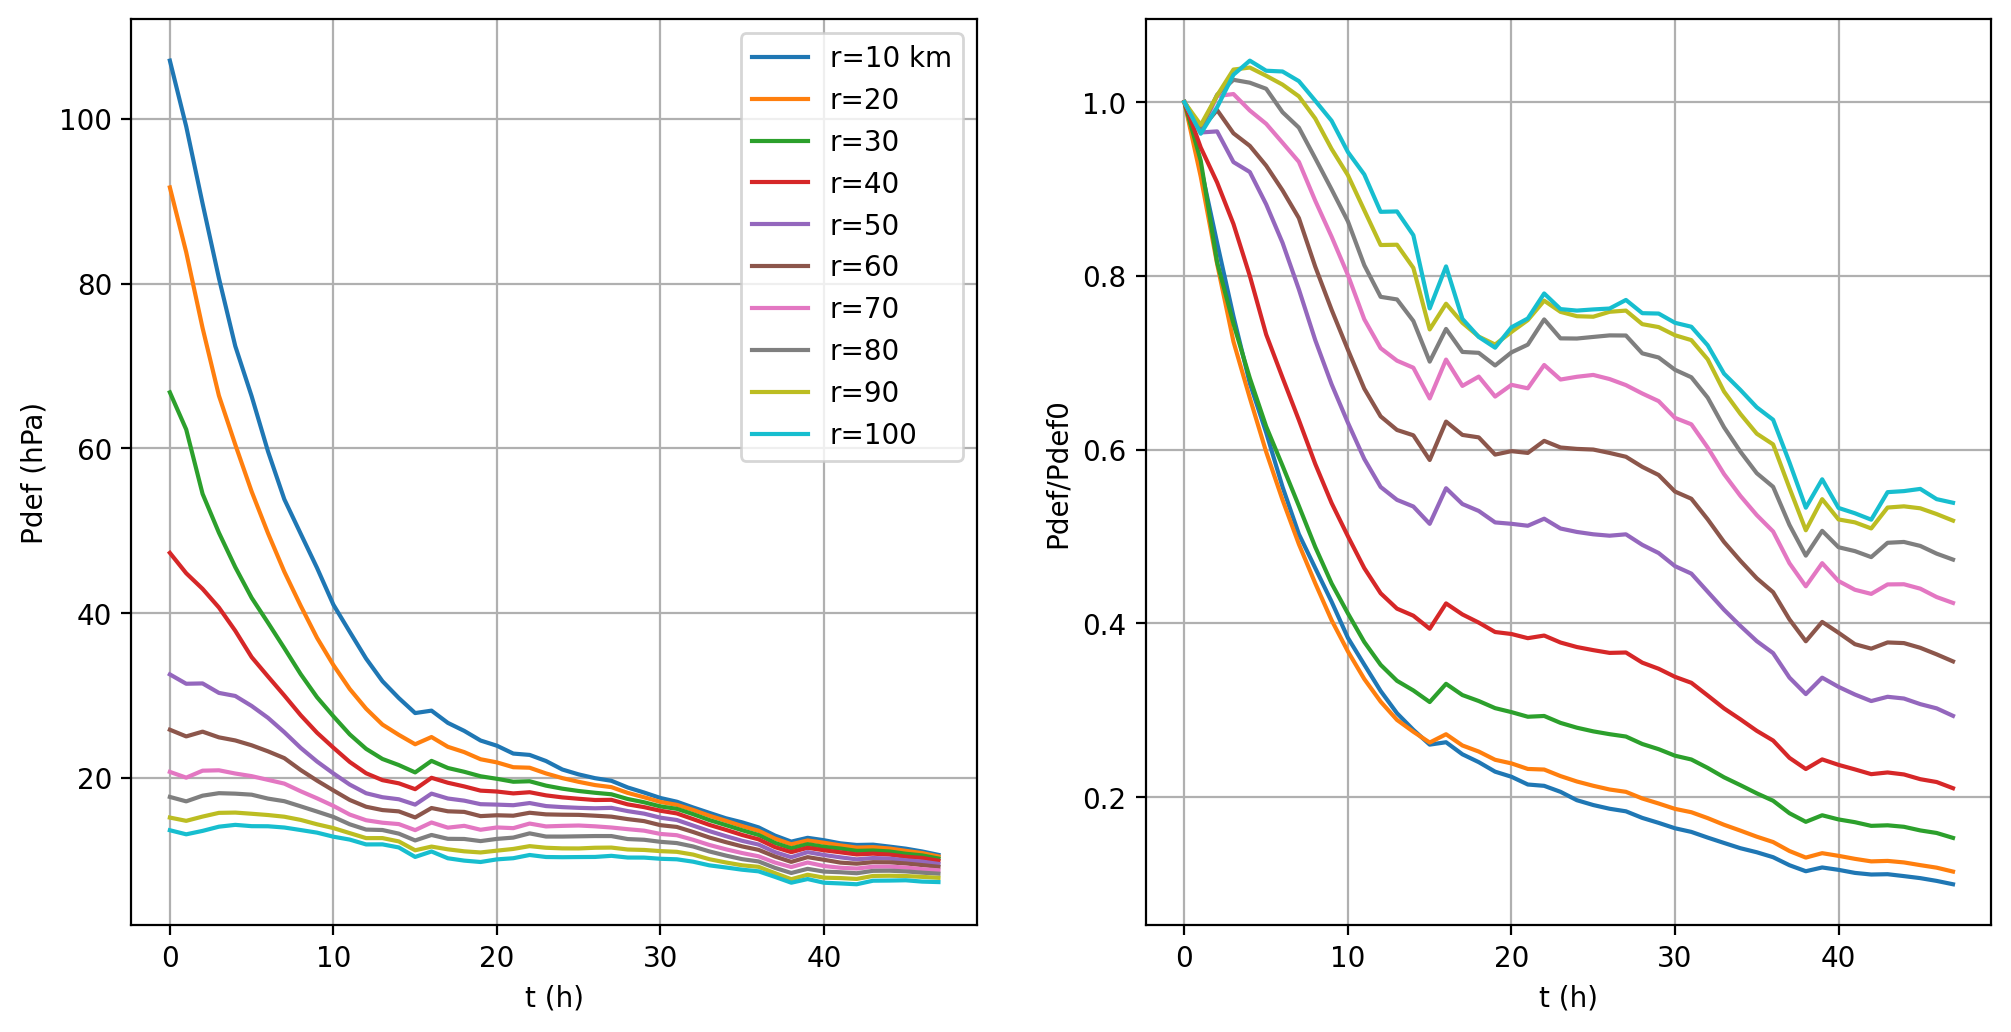

In [7]:
#@title
df=dfs[0]
df
p0=1016
fig,axs=plt.subplots(1,2,figsize=(12,6),dpi=200)

p10=p0-df.p10.values
p20=p0-df.p20.values
p30=p0-df.p30.values
p40=p0-df.p40.values
p50=p0-df.p50.values
p60=p0-df.p60.values
p70=p0-df.p70.values
p80=p0-df.p80.values
p90=p0-df.p90.values
p100=p0-df.p100.values
p150=p0-df.p150.values
p200=p0-df.p200.values
ax=0


axs[ax].plot(p10)
axs[ax].plot(p20)
axs[ax].plot(p30)
axs[ax].plot(p40)
axs[ax].plot(p50)
axs[ax].plot(p60)
axs[ax].plot(p70)
axs[ax].plot(p80)
axs[ax].plot(p90)
axs[ax].plot(p100)
axs[ax].set_xlabel('t (h)')
axs[ax].set_ylabel('Pdef (hPa)')

axs[ax].legend(('r=10 km','r=20','r=30','r=40','r=50','r=60','r=70','r=80','r=90','r=100'))
axs[ax].grid(True)

ax=1
axs[ax].plot(p10/p10[0])
axs[ax].plot(p20/p20[0])
axs[ax].plot(p30/p30[0])
axs[ax].plot(p40/p40[0])
axs[ax].plot(p50/p50[0])
axs[ax].plot(p60/p60[0])
axs[ax].plot(p70/p70[0])
axs[ax].plot(p80/p80[0])
axs[ax].plot(p90/p90[0])
axs[ax].plot(p100/p100[0])
axs[ax].set_xlabel('t (h)')
axs[ax].set_ylabel('Pdef/Pdef0')
axs[ax].grid(True)

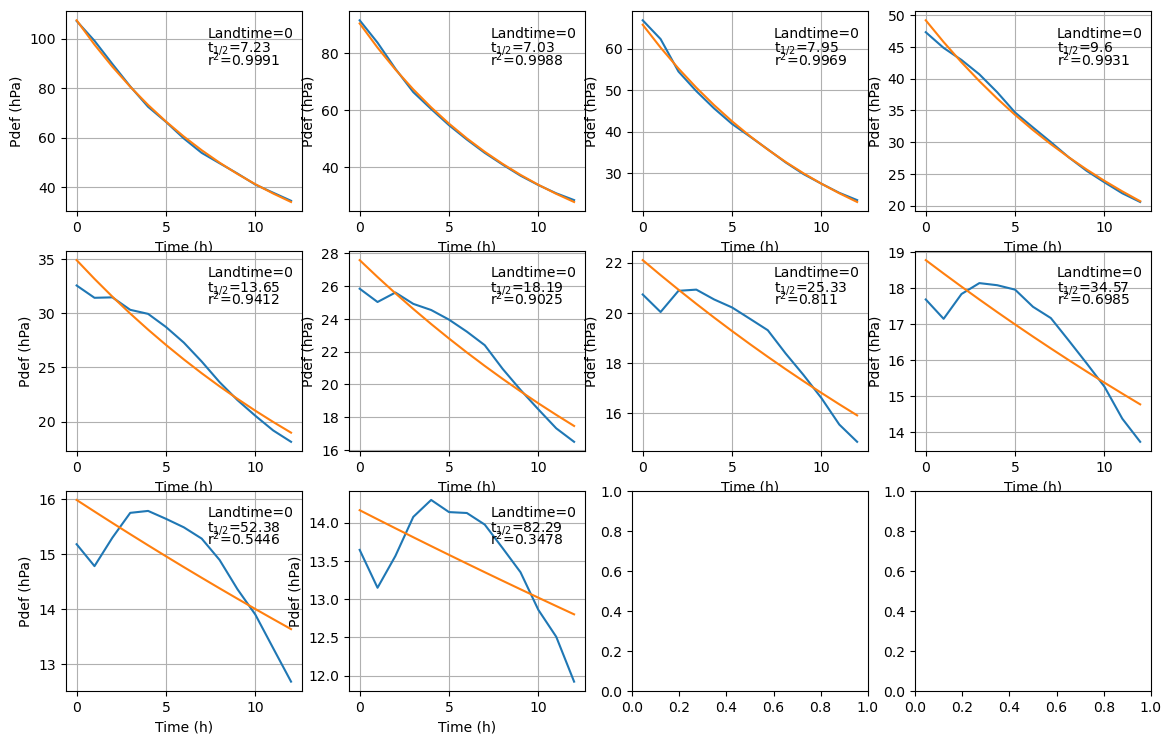

In [8]:
#@title
th=[]

fig, axs = plt.subplots(3,4,figsize=(14,9),dpi=100)
th.append(getHalfLife(p10,axs.flat[0]))
th.append(getHalfLife(p20,axs.flat[1]))
th.append(getHalfLife(p30,axs.flat[2]))
th.append(getHalfLife(p40,axs.flat[3]))
th.append(getHalfLife(p50,axs.flat[4]))
th.append(getHalfLife(p60,axs.flat[5]))
th.append(getHalfLife(p70,axs.flat[6]))
th.append(getHalfLife(p80,axs.flat[7]))
th.append(getHalfLife(p90,axs.flat[8]))
th.append(getHalfLife(p100,axs.flat[9]))
# th.append(getHalfLife(p150,axs.flat[10]))
# th.append(getHalfLife(p200,axs.flat[11]))

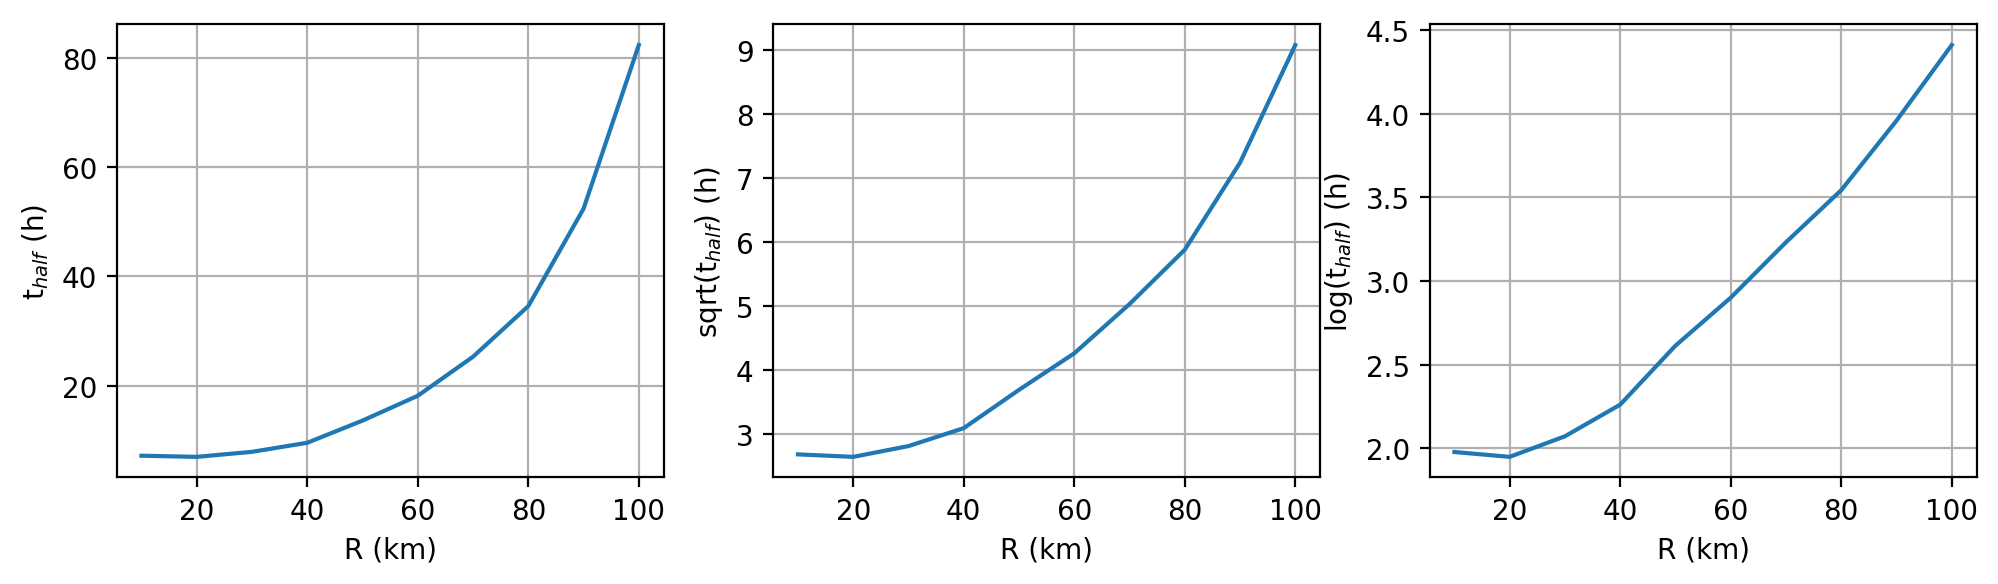

In [9]:
#@title
fig,axs=plt.subplots(1,3,figsize=(12,3),dpi=200)
r=np.arange(10,110,10)

def plot_sub(ax,x,y,ylab):
  ax.plot(x,y)
  ax.set_xlabel('R (km)')
  ax.set_ylabel(ylab)
  ax.grid(True)

plot_sub(axs[0],r,th,'t$_{half}$ (h)')
plot_sub(axs[1],r,np.sqrt(th),'sqrt(t$_{half}$) (h)')
plot_sub(axs[2],r,np.log(th),'log(t$_{half}$) (h)')
